## Day 34 Lecture 1 Assignment

In this assignment, we will learn about SVR. We will use the absenteeism at work dataset loaded below and analyze the model generated for this dataset.

In [1]:
%matplotlib inline

import math

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [2]:
absent = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv', sep=';')

In [3]:
absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


We previously used this dataset for KNN regression. Recall that we removed all correlated columns as well as columns that are a function of two or more other columns (like BMI and weight and height) as well as columns that are not useful to us (like ID).
We also created dummy variables for the categorical columns in our dataset.
Finally, we split the data into test and train (with test being 20% of the data).

Perform these actions below.

In [4]:
#answer below:
absent = pd.concat([absent, pd.get_dummies(absent['Son'], drop_first=True, prefix='Son')],  axis=1)
absent = pd.concat([absent, pd.get_dummies(absent['Education'], drop_first=True, prefix='Education')], axis=1)
absent = pd.concat([absent, pd.get_dummies(absent['Pet'], drop_first=True, prefix='Pet')], axis=1)
absent = pd.concat([absent, pd.get_dummies(absent['Day of the week'], drop_first=True, prefix='Day of week')], axis=1)
absent = absent.drop(columns=['ID', 'Son', 'Education', 'Pet', 'Seasons', 'Day of the week', 'Height', 'Weight'])

absent


,Reason for absence,Month of absence,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Social drinker,Social smoker,Body mass index,Absenteeism time in hours,Son_1,Son_2,Son_3,Son_4,Education_2,Education_3,Education_4,Pet_1,Pet_2,Pet_4,Pet_5,Pet_8,Day of week_3,Day of week_4,Day of week_5,Day of week_6
0,26,7,289,36,13,33,239.554,97,0,1,0,30,4,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,0,7,118,13,18,50,239.554,97,1,1,0,31,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,23,7,179,51,18,38,239.554,97,0,1,0,31,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,7,7,279,5,14,39,239.554,97,0,1,1,24,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,23,7,289,36,13,33,239.554,97,0,1,0,30,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,14,7,289,36,13,33,264.604,93,0,1,0,30,8,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0
736,11,7,235,11,14,37,264.604,93,0,0,0,29,4,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0
737,0,0,118,14,13,40,271.219,95,0,1,0,34,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
738,0,0,231,35,14,39,271.219,95,0,1,0,35,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0


Scale the independent variables using the standard scaler

In [5]:
# answer below:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


x = absent.drop(columns='Absenteeism time in hours')
y = absent['Absenteeism time in hours']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [28]:
x_train_scaled.shape

(592, 28)

In [7]:
x_test_scaled

array([[1.        , 0.41666667, 0.64074074, ..., 0.        , 1.        ,
        0.        ],
       [0.39285714, 0.91666667, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.91666667, 0.22592593, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.21428571, 0.91666667, 0.22592593, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.3962963 , ..., 0.        , 1.        ,
        0.        ],
       [0.67857143, 0.25      , 0.52592593, ..., 0.        , 0.        ,
        0.        ]])

Generate an SVR model to predict the number of hours of absenteeism. Compare the train and test scores.

In [19]:
# answer below:
svr_train = SVR(,)
fit_train = svr_train.fit(x_train_scaled, y_train)
svr_test = SVR()
fit_test = svr_test.fit(x_test_scaled, y_test)

print(f'SVR Train Score: {fit_train.score(x_train_scaled, y_train)}')
print(f'SVR Test Score: {fit_test.score(x_test_scaled, y_test)}')



SVR Train Score: 0.04605551836919086
SVR Test Score: -0.039296912391674654


If you are unhappy with your model's performance, perform a grid search to optimize C. You may also want to compare something other than R squared, like MSE, and could try some other kernels than just linear.

In [39]:
# answer below:
grid = GridSearchCV(estimator=svr_train, 
                    return_train_score=True, 
                    param_grid={'kernel':['linear', 'poly', 'rbf'], 
                    'C':[0.01, 0.1, 1, 10, 100], 
                    'epsilon':[0.001, 0.01, 0.1, 1, 10]})


In [40]:
grid.fit(x_train_scaled, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'epsilon': [0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [41]:
best_parameters = grid.best_params_
print(best_parameters)

{'C': 100, 'epsilon': 1, 'kernel': 'rbf'}


In [42]:
best_result = grid.best_score_
print(best_result)

0.11077243719545196


Create a homoscedasticity (residual) plot. Look back at your KNN regression exercise (Day 32 Lecture 1). How do your model results compare?

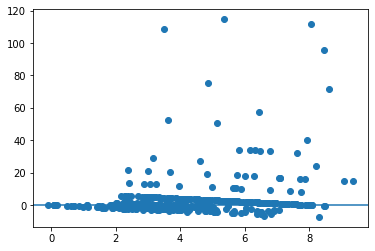

In [43]:
# answer below:
train_pred = fit_train.predict(x_train_scaled)

residual = y_train - train_pred

plt.scatter(train_pred, residual)
plt.axhline(y=0)